<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#CO2-Emission-Dataset" data-toc-modified-id="CO2-Emission-Dataset-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>CO2 Emission Dataset</a></span></li><li><span><a href="#GDP-Dataset" data-toc-modified-id="GDP-Dataset-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>GDP Dataset</a></span></li><li><span><a href="#Population-growth-dataset" data-toc-modified-id="Population-growth-dataset-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Population growth dataset</a></span></li><li><span><a href="#Population-total-dataset" data-toc-modified-id="Population-total-dataset-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Population total dataset</a></span></li></ul></li><li><span><a href="#First-insights" data-toc-modified-id="First-insights-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>First insights</a></span></li><li><span><a href="#Analysis-of-missing-values" data-toc-modified-id="Analysis-of-missing-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis of missing values</a></span></li><li><span><a href="#Add-new-dataset" data-toc-modified-id="Add-new-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Add new dataset</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

/Users/simonruber/Library/Caches/pypoetry/virtualenvs/fu-db-a10-hUAztf1z-py3.9/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
base_path = '../data/'

Import datasets

In [17]:
co2_emission_df = pd.read_csv(base_path+'co2_emission.csv')
gdp_df = pd.read_csv(base_path+'gdp.csv')
population_growth_df = pd.read_csv(base_path+'population_growth.csv')
population_total_df = pd.read_csv(base_path+'population_total.csv')

### CO2 Emission Dataset

In [31]:
co2_emission_df_cl = co2_emission_df.rename(columns={'Entity':'country', 
                                                     'Code': 'country_code',
                                                    'Year':'year',
                                                    'Annual CO₂ emissions (tonnes )':'emissions_in_tonnes'})
co2_emission_df_cl = co2_emission_df_cl[co2_emission_df_cl['year']>= 1960]
co2_emission_df_cl

,country,country_code,year,emissions_in_tonnes
11,Afghanistan,AFG,1960,413883.42
12,Afghanistan,AFG,1961,490797.70
13,Afghanistan,AFG,1962,688594.27
14,Afghanistan,AFG,1963,706735.98
15,Afghanistan,AFG,1964,838550.83
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [32]:
co2_emission_df_wide = co2_emission_df_cl.pivot(index=['country','country_code'], columns='year', values='emissions_in_tonnes')
co2_emission_df_wide = co2_emission_df_wide.reset_index()
co2_emission_df_wide

year,country,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,4.138834e+05,4.907977e+05,6.885943e+05,7.067360e+05,8.385508e+05,1.006917e+06,1.091159e+06,1.281865e+06,...,4.198330e+06,6.760313e+06,8.452224e+06,1.222602e+07,1.074206e+07,1.000041e+07,9.789186e+06,1.010743e+07,1.225791e+07,1.301474e+07
1,Africa,NaN,1.565671e+08,1.619943e+08,1.663348e+08,1.763347e+08,1.936392e+08,2.136343e+08,2.210820e+08,2.370450e+08,...,1.178143e+09,1.188276e+09,1.193784e+09,1.198373e+09,1.233842e+09,1.250644e+09,1.290489e+09,1.289003e+09,1.310656e+09,1.331740e+09
2,Albania,ALB,2.022528e+06,2.279008e+06,2.462208e+06,2.081152e+06,2.015200e+06,2.172752e+06,2.550144e+06,2.678384e+06,...,4.371152e+06,4.374816e+06,4.594656e+06,5.235856e+06,4.906096e+06,5.059984e+06,5.712176e+06,5.947724e+06,6.272858e+06,6.379207e+06
3,Algeria,DZA,6.151241e+06,6.055917e+06,5.661008e+06,5.419154e+06,5.643044e+06,6.588535e+06,8.420862e+06,8.431586e+06,...,1.090318e+08,1.201859e+08,1.178141e+08,1.198069e+08,1.281100e+08,1.324346e+08,1.431771e+08,1.505925e+08,1.503780e+08,1.505514e+08
4,Americas (other),NaN,4.910671e+08,4.993380e+08,5.312335e+08,5.351952e+08,5.874675e+08,6.124103e+08,6.370551e+08,6.889737e+08,...,2.226580e+09,2.157619e+09,2.253919e+09,2.294779e+09,2.375406e+09,2.406775e+09,2.443171e+09,2.435554e+09,2.415058e+09,2.398632e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.198400e+04,2.931200e+04,2.931200e+04,2.564800e+04,2.564800e+04,2.198400e+04,2.198400e+04,2.399058e+04,2.426549e+04,2.590908e+04
229,World,OWID_WRL,9.410530e+09,9.452108e+09,9.838202e+09,1.037907e+10,1.096933e+10,1.146615e+10,1.204556e+10,1.243101e+10,...,3.187576e+10,3.152314e+10,3.306665e+10,3.435737e+10,3.491929e+10,3.520789e+10,3.550583e+10,3.546275e+10,3.567510e+10,3.615326e+10
230,Yemen,YEM,3.631024e+06,2.663728e+06,3.883840e+06,2.916544e+06,3.631024e+06,3.927808e+06,3.462480e+06,3.052112e+06,...,2.202498e+07,2.424756e+07,2.315186e+07,1.951301e+07,1.823825e+07,2.498041e+07,2.226257e+07,2.038460e+07,1.913542e+07,1.896575e+07
231,Zambia,ZMB,4.355226e+06,3.708956e+06,3.582681e+06,3.444484e+06,3.274992e+06,3.912261e+06,3.498229e+06,4.787630e+06,...,2.105556e+06,2.406281e+06,2.562578e+06,2.792593e+06,3.480662e+06,3.756145e+06,4.255726e+06,4.401413e+06,4.575144e+06,4.746148e+06


### GDP Dataset

In [39]:
gdp_df_cl = gdp_df.drop('Unnamed: 65', axis=1)
gdp_df_cl = gdp_df_cl.rename(columns={'Country Name': 'country',
                                      'Country Code': 'country_code',
                                      'Indicator Name': 'indicator_name',
                                      'Indicator Code': 'indicator_code'
                                     })
gdp_df_cl

,country,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.701698e+09,6.499807e+09,7.074778e+09,7.396705e+09,6.442916e+09,6.719172e+09,7.245707e+09,7.942962e+09,7.926134e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+10,3.540134e+10,4.041524e+10,4.320647e+10,4.245062e+10,3.093598e+10,2.673614e+10,2.348627e+10,2.258108e+10,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,4.164189e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,3.514316e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.345952e+10,2.550306e+10,2.804555e+10,2.715073e+10,2.124334e+10,2.095475e+10,2.586817e+10,2.631214e+10,2.330977e+10,NaN


In [40]:
gdp_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

### Population growth dataset

In [42]:
population_growth_df_cl = population_growth_df.rename(columns={'Country Name': 'country',
                                                               'Country Code': 'country_code',
                                                               'Indicator Name': 'indicator_name',
                                                               'Indicator Code': 'indicator_code'
                                                              })


### Population total dataset

In [45]:
population_total_df_cl = population_total_df.rename(columns={'Country Name': 'country',
                                                                'Year': 'year',
                                                                'Count': 'count',
                                                              })
population_total_df_cl

,country,year,count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411
...,...,...,...
12590,Kosovo,2017,1830700
12591,"Yemen, Rep.",2017,27834821
12592,South Africa,2017,57000451
12593,Zambia,2017,16853688


In [47]:
population_total_df_wide = population_total_df_cl.pivot(index=['country'], columns='year', values='count')
population_total_df_wide = population_total_df_wide.reset_index()
population_total_df_wide

year,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,...,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0
1,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
2,Algeria,11057863.0,11336339.0,11619828.0,11912803.0,12221675.0,12550885.0,12902627.0,13275026.0,13663583.0,...,34730608.0,35333881.0,35977455.0,36661444.0,37383887.0,38140132.0,38923687.0,39728025.0,40551404.0,41389198.0
3,American Samoa,20123.0,20602.0,21253.0,22034.0,22854.0,23672.0,24462.0,25248.0,25989.0,...,57492.0,56683.0,56079.0,55759.0,55667.0,55713.0,55791.0,55812.0,55741.0,55620.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Virgin Islands (U.S.),32500.0,34300.0,35000.0,39800.0,40800.0,43500.0,46200.0,49100.0,55700.0,...,108399.0,108405.0,108358.0,108292.0,108191.0,108044.0,107884.0,107710.0,107510.0,107268.0
215,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3591977.0,3689099.0,3786161.0,3882986.0,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0
216,"Yemen, Rep.",5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,...,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0
217,Zambia,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,3918872.0,...,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0


## First insights
* Smallest overlapping time frame in the datasets is from 1960 to 2017
* even though the co2 emmission dataset starts at 1751
* Key can be Country Code for all sets except population_total_df

In [48]:
sparsities = {}
sparsities['co2 emmision dataset % of Nan values'] = co2_emmision_df_wide.isna().sum()/co2_emmision_df_wide.shape[0]
sparsities['gdp dataset % of Nan values'] = gdp_df_cl.isna().sum()/gdp_df_cl.shape[0]
sparsities['population growth dataset % of Nan values'] = population_growth_df.isna().sum()/population_growth_df.shape[0]
sparsities['population total dataset % of Nan values'] = population_total_df_wide.isna().sum()/population_total_df_wide.shape[0]

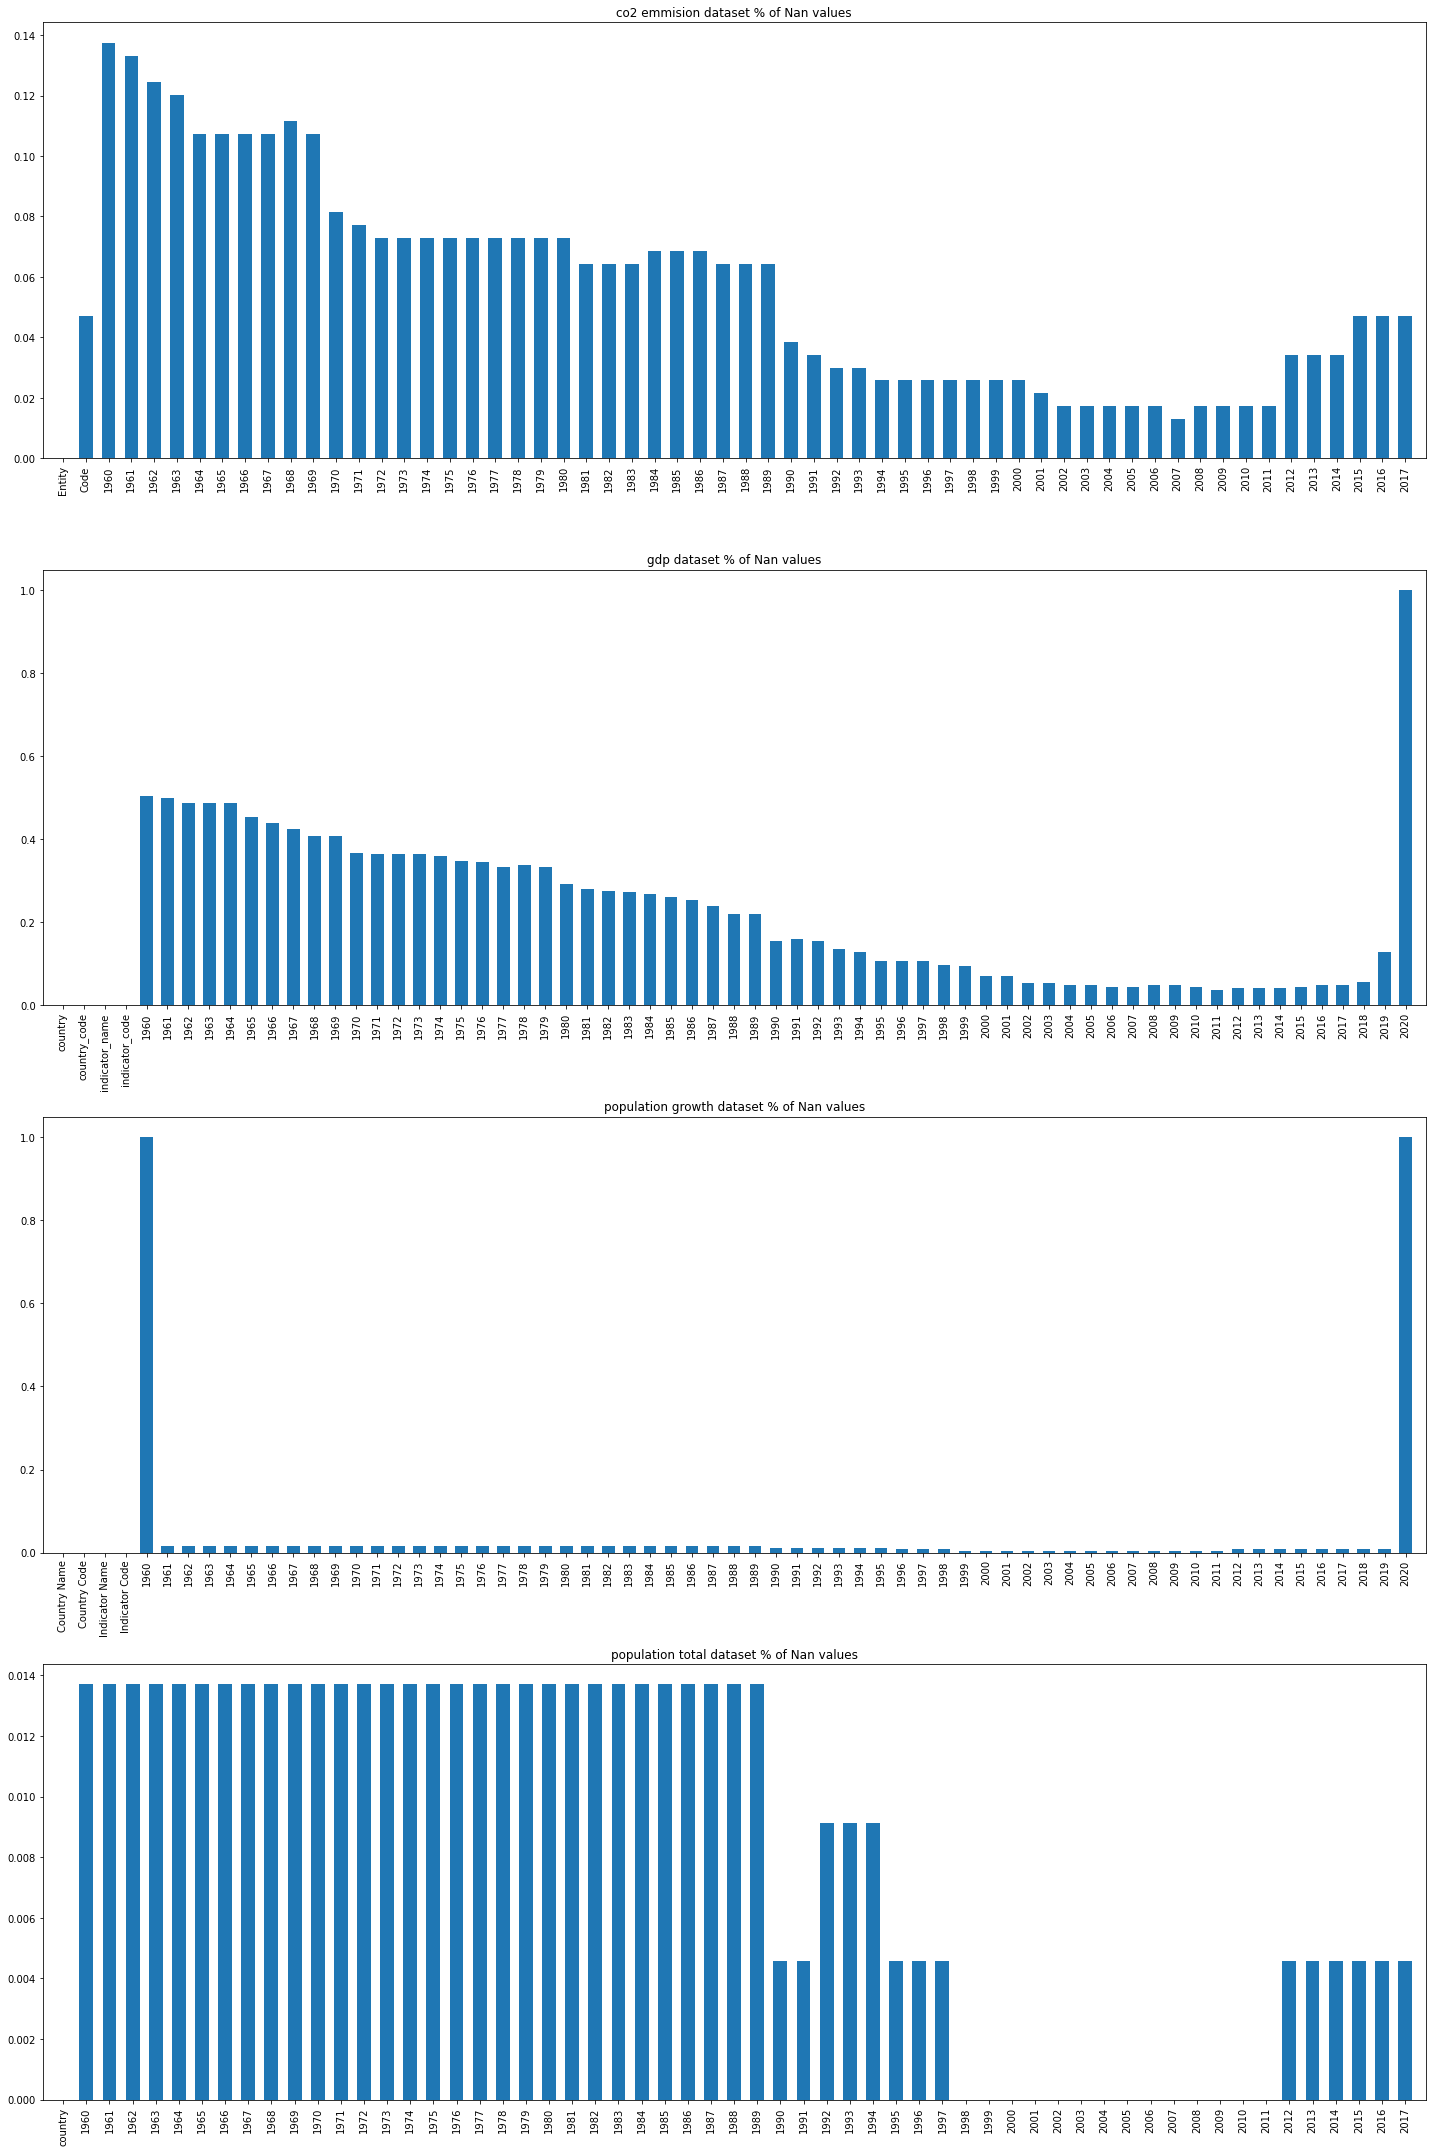

In [49]:
fig, axs = plt.subplots(len(sparsities),1, figsize=(20,30))
for i, (key, val) in enumerate(sparsities.items()):
    #row = math.floor(i/2)
    #col = i%2
    #print(val.index.tolist())
    idx = [str(x) for x in val.index.tolist()]
    axs[i].bar(idx, val.values, width=0.6,align='center')
    axs[i].set_title(key)
    axs[i].tick_params(axis='x', labelrotation = 90)
    axs[i].margins(x=0.01)
fig.tight_layout()
plt.show()

## Analysis of missing values
* co2 dataset has in the range of 1961-2017 at maximum ~13% of missing values in single columns 
    * Some rows are missing country codes because of aggregations (to continents or regions without country codes)
* gdp dataset has in the range of 1961-2017 at maximum ~50% of missing values in single columns
* population growth dataset has in the range of 1961-2017 at maximum ~0.1% of missing values in single columns
* population total dataset has in the range of 1961-2017 at maximum ~1.4% of missing values in single columns

## Add new dataset

In [69]:
temperature_1961_1990_df = pd.read_csv(base_path+'temperature_1961_1990_cl.csv', delimiter=';')
temperature_1991_2020_df = pd.read_csv(base_path+'temperature_1991_2020_cl.csv', delimiter=';')

In [70]:
temperature_1961_1990_df_cl = temperature_1961_1990_df.rename(columns={'Temperature - (Celsius)': 'temperature_in_celsius',
                                        'Year':'year',
                                         'Statistics':'statistics',
                                         'Country': 'country',
                                         'ISO3': 'country_code'
                                        })
temperature_1961_1990_df_cl

,temperature_in_celsius,Year,Statistics,Country,ISO3
0,1.2,1961,Jan Average,Afghanistan,AFG
1,0.8,1961,Feb Average,Afghanistan,AFG
2,7.9,1961,Mar Average,Afghanistan,AFG
3,12.2,1961,Apr Average,Afghanistan,AFG
4,19.2,1961,May Average,Afghanistan,AFG
...,...,...,...,...,...
70555,17.8,1990,Aug Average,Zimbabwe,ZWE
70556,20.5,1990,Sep Average,Zimbabwe,ZWE
70557,24.6,1990,Oct Average,Zimbabwe,ZWE
70558,25.4,1990,Nov Average,Zimbabwe,ZWE


In [74]:
temperature_1991_2020_df_cl = temperature_1991_2020_df.rename(columns={'Temperature - (Celsius)': 'temperature_in_celsius',
                                        'Year':'year',
                                         'Statistics':'statistics',
                                         'Country': 'country',
                                         'ISO3': 'country_code'
                                        })
temperature_1991_2020_df_cl

,temperature_in_celsius,Year,Statistics,Country,ISO3
0,0.1,1991,Jan Average,Afghanistan,AFG
1,1.4,1991,Feb Average,Afghanistan,AFG
2,6.9,1991,Mar Average,Afghanistan,AFG
3,12.9,1991,Apr Average,Afghanistan,AFG
4,17.0,1991,May Average,Afghanistan,AFG
...,...,...,...,...,...
70555,18.7,2020,Aug Average,Zimbabwe,ZWE
70556,22.0,2020,Sep Average,Zimbabwe,ZWE
70557,24.3,2020,Oct Average,Zimbabwe,ZWE
70558,26.2,2020,Nov Average,Zimbabwe,ZWE
